This analysis was done as an assignment for the module applied artificial intelligence within my master program strategic information management. Parts of the code have been taken from different sources and then modified to the specific needs of this analysis.
<br>

The goal was to analyse the dataset, identify drivers for churn and develop a classifier to predict churn of individual customers

# Churn Prediction for a Telecommunication Provider

<img src="churn_pic.jpg" alt="alt_text" align="left"/>

#### The Dataset
All entries have several features and a column stating if the customer has churned or not.
- Customers who **left within the last month** — the column is called Churn
- Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information — how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers — gender, age range, and if they have partners and dependents
<br>

####  Rows
- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

### Initial exploration and modification of data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv('Telco-Customer-Churn-Data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#copy dataset to later use initially imported version
df = data

In [4]:
#Check for the null values if any
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# get additional info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7051 entries, 0 to 7050
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7051 non-null   object 
 1   gender            7051 non-null   object 
 2   SeniorCitizen     7051 non-null   int64  
 3   Partner           7051 non-null   object 
 4   Dependents        7051 non-null   object 
 5   tenure            7051 non-null   int64  
 6   PhoneService      7051 non-null   object 
 7   MultipleLines     7051 non-null   object 
 8   InternetService   7051 non-null   object 
 9   OnlineSecurity    7051 non-null   object 
 10  OnlineBackup      7051 non-null   object 
 11  DeviceProtection  7051 non-null   object 
 12  TechSupport       7051 non-null   object 
 13  StreamingTV       7051 non-null   object 
 14  StreamingMovies   7051 non-null   object 
 15  Contract          7051 non-null   object 
 16  PaperlessBilling  7051 non-null   object 


In [6]:
#Transforming dtype of Total Charges column from object to float. Errors are therby converted into NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill missing values with mean column values
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
#df.info()

In [7]:
#Check for Churn distribution
df['Churn'].value_counts()
print('\nTotal Churn Rate: {:.2%}'.format(df[df['Churn'] == 'Yes'].shape[0] / df.shape[0]))


Total Churn Rate: 26.52%


-> The dataset is imbalanced. The training data set will later need to get balanced before running a model.

In [8]:
#Changing Churn from string to binaries. With unbalanced dataset the minor class (churned customers) is set postive or equal to 1.
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [9]:
#Convert 'no internet' to 'no' because its will be handled the same as no.
cols = ['OnlineBackup', 'StreamingMovies', 'DeviceProtection', 'TechSupport', 'OnlineSecurity', 'StreamingTV']

for i in cols:
    df[i] = df[i].replace({'No internet service' : 'No'})

### First data analysis

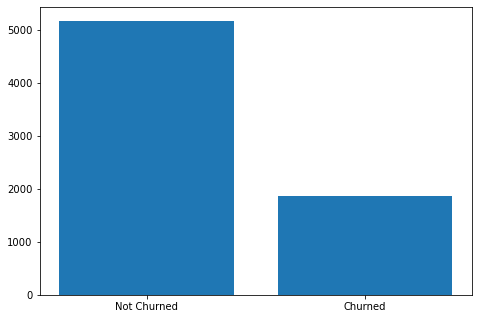

In [10]:
no,yes = df['Churn'].value_counts()
# plt.barplot(no,yes)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not Churned', 'Churned']
students = [no, yes]
ax.bar(langs,students)
plt.show()

#### For those who unsubscribed the service, what was their average LTV?

In [11]:
churned = df[df.Churn == 1 ]

In [12]:
#mean LTV of unsubscribed customers
churned['TotalCharges'].mean()

1531.1409090909083

C:\Users\Max\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

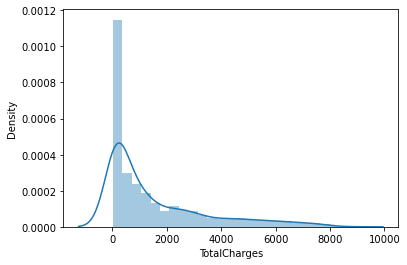

In [13]:
#distributrion of LTV of unsubscribed customers
sns.distplot(churned['TotalCharges'])

#### For those who unsubscribed the service how long did they usually stay in the service?

In [14]:
#mean tenure of unsubscribed customers
churned['tenure'].mean()

17.971657754010696

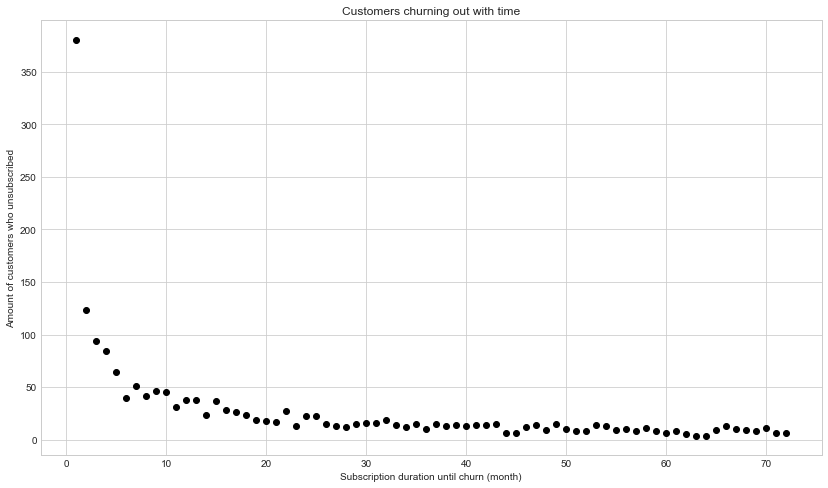

In [15]:
# Amount of customers churning out with time
tenuredf = churned['tenure'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (14,8))
plt.xlabel('Subscription duration until churn (month)')
plt.ylabel('Amount of customers who unsubscribed')
plt.title('Customers churning out with time')
plt.plot(tenuredf, 'o', color='black');


#### For those who unsubscribed the service what kinds of service they subscribed when they were still staying in subscription?

<BarContainer object of 10 artists>

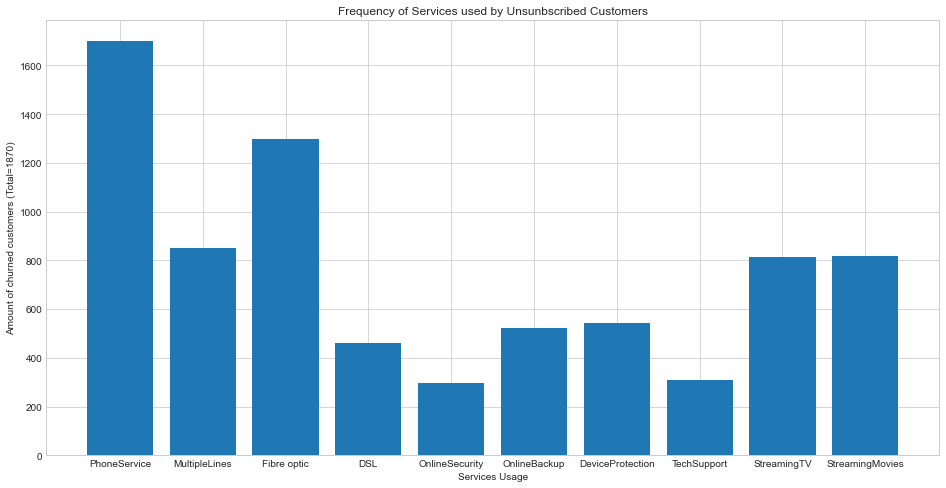

In [16]:
services = ['PhoneService','MultipleLines','Fibre optic', 'DSL','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
frequencies = []
yes,no = churned['PhoneService'].value_counts()
frequencies.append(yes)
yes,no,no_service = churned['MultipleLines'].value_counts()
frequencies.append(yes)
fibre_optic,DSL,no = churned['InternetService'].value_counts()
frequencies.append(fibre_optic)
frequencies.append(DSL)
no, yes = churned['OnlineSecurity'].value_counts()
frequencies.append(yes)
no,yes = churned['OnlineBackup'].value_counts()
frequencies.append(yes)
no,yes = churned['DeviceProtection'].value_counts()
frequencies.append(yes)
no,yes = churned['TechSupport'].value_counts()
frequencies.append(yes)
no,yes = churned['StreamingTV'].value_counts()
frequencies.append(yes)
no,yes = churned['StreamingMovies'].value_counts()
frequencies.append(yes)

plt.figure(figsize = (16,8))
plt.ylabel('Amount of churned customers (Total=1870)')
plt.xlabel('Services Usage')
plt.title('Frequency of Services used by Unsunbscribed Customers')
plt.bar(services,frequencies)

-> Quick note: The internet service was split up into fibre optics and DSL.

#### How often services are used by all customers (churned and not churned)?

<BarContainer object of 10 artists>

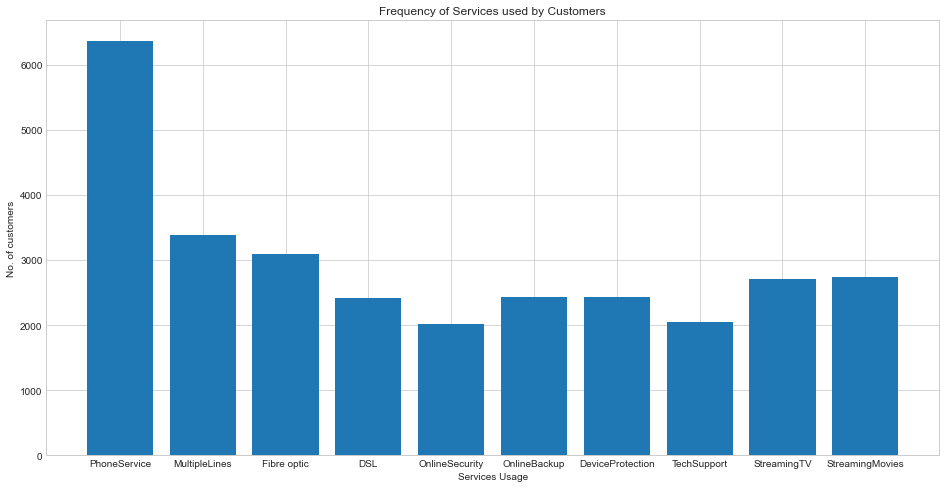

In [17]:
services0 = ['PhoneService','MultipleLines','Fibre optic', 'DSL','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
frequencies0 = []
yes,no = df['PhoneService'].value_counts()
frequencies0.append(yes)
yes,no,no_service = df['MultipleLines'].value_counts()
frequencies0.append(yes)
fibre_optic,DSL,no = df['InternetService'].value_counts()
frequencies0.append(fibre_optic)
frequencies0.append(DSL)
no, yes = df['OnlineSecurity'].value_counts()
frequencies0.append(yes)
no,yes = df['OnlineBackup'].value_counts()
frequencies0.append(yes)
no,yes = df['DeviceProtection'].value_counts()
frequencies0.append(yes)
no,yes = df['TechSupport'].value_counts()
frequencies0.append(yes)
no,yes = df['StreamingTV'].value_counts()
frequencies0.append(yes)
no,yes = df['StreamingMovies'].value_counts()
frequencies0.append(yes)

plt.figure(figsize = (16,8))
plt.ylabel('No. of customers')
plt.xlabel('Services Usage')
plt.title('Frequency of Services used by Customers')
plt.bar(services0,frequencies0)

#### For those who are still paying the service, what was their avarage LTV?

In [18]:
#mean tenure of unsubscribed customers
notchurned = df[df.Churn == 0 ]
notchurned['TotalCharges'].mean()

2555.2140047318403

#### For those who are still paying the service how long did they usually stay in the service?

In [19]:
#mean tenure of unsubscribed customers
notchurned['tenure'].mean()

37.572476355915846

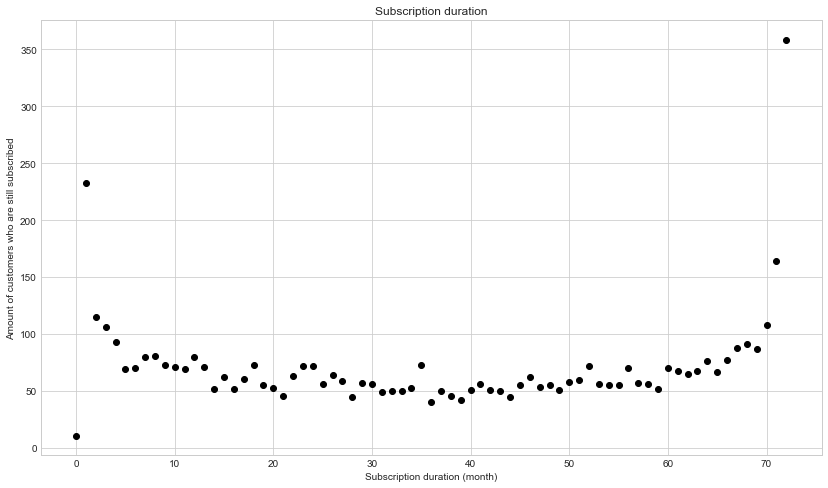

In [20]:
# Amount of customers churning out with time
tenuredf2 = notchurned['tenure'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (14,8))
plt.xlabel('Subscription duration (month)')
plt.ylabel('Amount of customers who are still subscribed')
plt.title('Subscription duration')
plt.plot(tenuredf2, 'o', color='black')

#### For those who are still paying the service what are the proportions of each kind of service they are paying?¶

<BarContainer object of 10 artists>

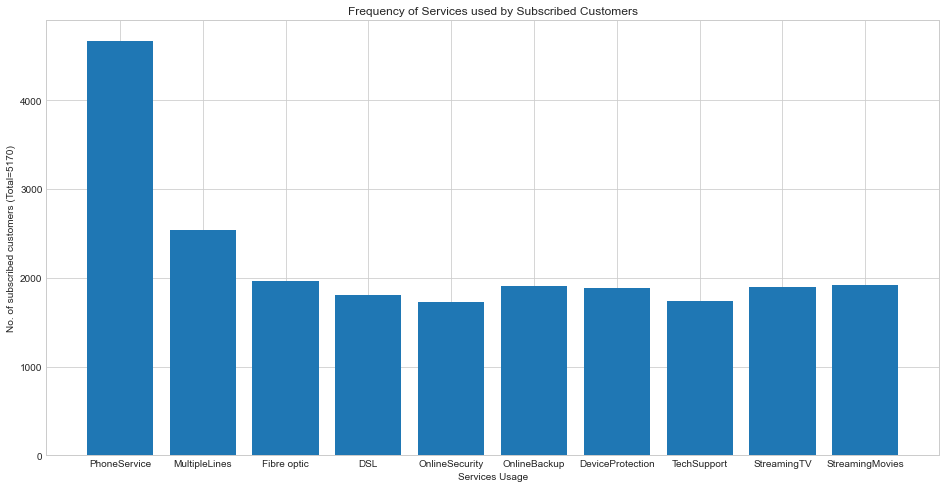

In [21]:
services2 = ['PhoneService','MultipleLines','Fibre optic', 'DSL','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
frequencies2 = []
yes,no = notchurned['PhoneService'].value_counts()
frequencies2.append(yes)
yes,no,no_service = notchurned['MultipleLines'].value_counts()
frequencies2.append(yes)
fibre_optic,DSL,no = notchurned['InternetService'].value_counts()
frequencies2.append(fibre_optic)
frequencies2.append(DSL)
no, yes = notchurned['OnlineSecurity'].value_counts()
frequencies2.append(yes)
no,yes = notchurned['OnlineBackup'].value_counts()
frequencies2.append(yes)
no,yes = notchurned['DeviceProtection'].value_counts()
frequencies2.append(yes)
no,yes = notchurned['TechSupport'].value_counts()
frequencies2.append(yes)
no,yes = notchurned['StreamingTV'].value_counts()
frequencies2.append(yes)
no,yes = notchurned['StreamingMovies'].value_counts()
frequencies2.append(yes)


plt.figure(figsize = (16,8))
plt.ylabel('No. of subscribed customers (Total=5170)')
plt.xlabel('Services Usage')
plt.title('Frequency of Services used by Subscribed Customers')
plt.bar(services2,frequencies2)

#### Which customer segment has tendency for churn? Which segment do you want to focus on?

Analysed in Power BI

<AxesSubplot:xlabel='TechSupport'>

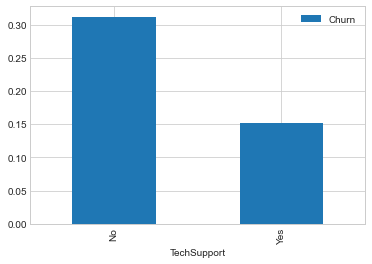

In [22]:
#churn rate for tech support
tech_churn = df.groupby('TechSupport').Churn.mean().reset_index()
tech_churn.plot.bar(x='TechSupport', y='Churn')

<AxesSubplot:xlabel='InternetService'>

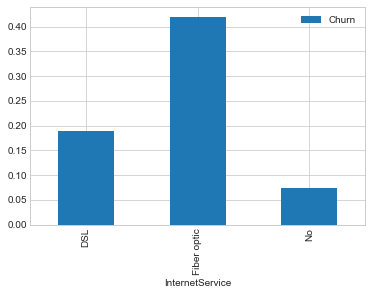

In [23]:
#churn rate for internet service
internet_churn = df.groupby('InternetService').Churn.mean().reset_index()
internet_churn.plot.bar(x='InternetService', y='Churn')

Very high churn rate for fibre optic customers

<AxesSubplot:xlabel='PaperlessBilling'>

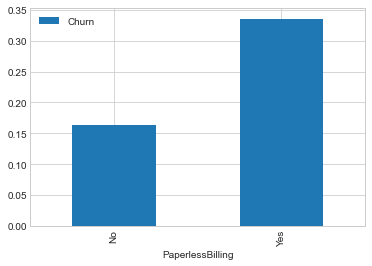

In [24]:
#churn rate for billing method
billing_churn = df.groupby('PaperlessBilling').Churn.mean().reset_index()
billing_churn.plot.bar(x='PaperlessBilling', y='Churn')

<AxesSubplot:xlabel='PaymentMethod'>

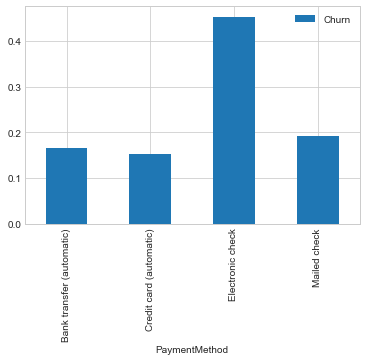

In [25]:
#churn rate for payment method
payment_churn = df.groupby('PaymentMethod').Churn.mean().reset_index()
payment_churn.plot.bar(x='PaymentMethod', y='Churn')

<AxesSubplot:xlabel='PaymentMethod'>

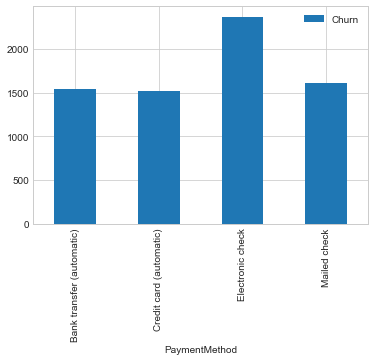

In [26]:
payment_churn = df.groupby('PaymentMethod').count().reset_index()
payment_churn.plot.bar(x='PaymentMethod', y='Churn')

Electronic Check has very high churn rates

<AxesSubplot:xlabel='Contract'>

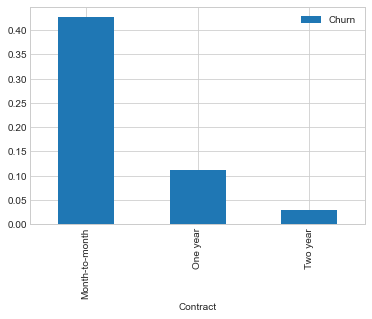

In [27]:
#churn rate for Contract duration
Contract_churn = df.groupby('Contract').Churn.mean().reset_index()
Contract_churn.plot.bar(x='Contract', y='Churn')

Customers with monthly contracts are more likely to churn

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

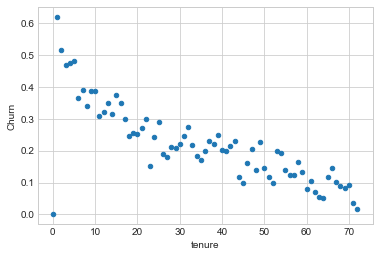

In [28]:
#churn rate for tenure = Month in company
tenure_churn = df.groupby('tenure').Churn.mean().reset_index()
tenure_churn.plot.scatter(x='tenure', y='Churn')

The longer a customer is already subsribed, the less likely he or she will churn

####  Customer churn for different segments

<AxesSubplot:xlabel='gender'>

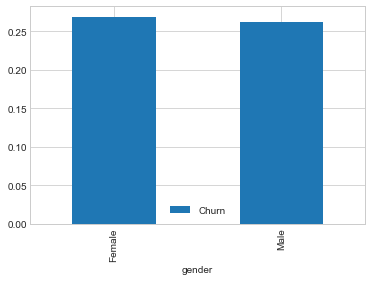

In [29]:
#churn rate for males vs females
gender_churn = df.groupby('gender').Churn.mean().reset_index()
gender_churn.plot.bar(x='gender', y='Churn')

<AxesSubplot:xlabel='SeniorCitizen'>

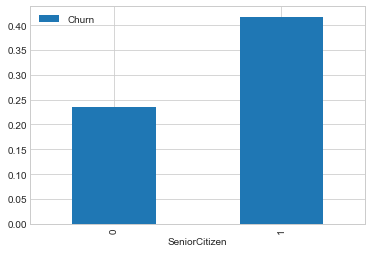

In [30]:
#churn rate for seniors
senior_churn = df.groupby('SeniorCitizen').Churn.mean().reset_index()
senior_churn.plot.bar(x='SeniorCitizen', y='Churn')

<AxesSubplot:xlabel='Partner'>

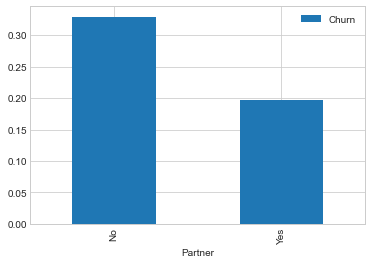

In [31]:
#churn rate for people with partners
partner_churn = df.groupby('Partner').Churn.mean().reset_index()
partner_churn.plot.bar(x='Partner', y='Churn')

<AxesSubplot:xlabel='Dependents'>

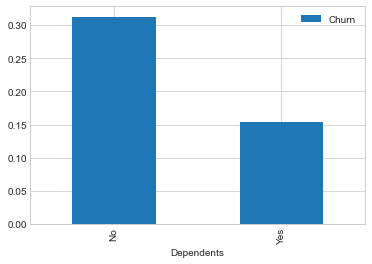

In [32]:
#churn rate for people with dependents
dependent_churn = df.groupby('Dependents').Churn.mean().reset_index()
dependent_churn.plot.bar(x='Dependents', y='Churn')

Further analyses for this question done in Power BI

#### Some more data transformations for further analysis

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1

#### Check for Correlations

Most Positive Correlations: 
 MonthlyCharges      0.193167
PaperlessBilling    0.191542
SeniorCitizen       0.151562
PhoneService        0.012379
dtype: float64

Most Negative Correlations: 
 Partner        -0.149996
Dependents     -0.164375
TotalCharges   -0.199558
tenure         -0.352284
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

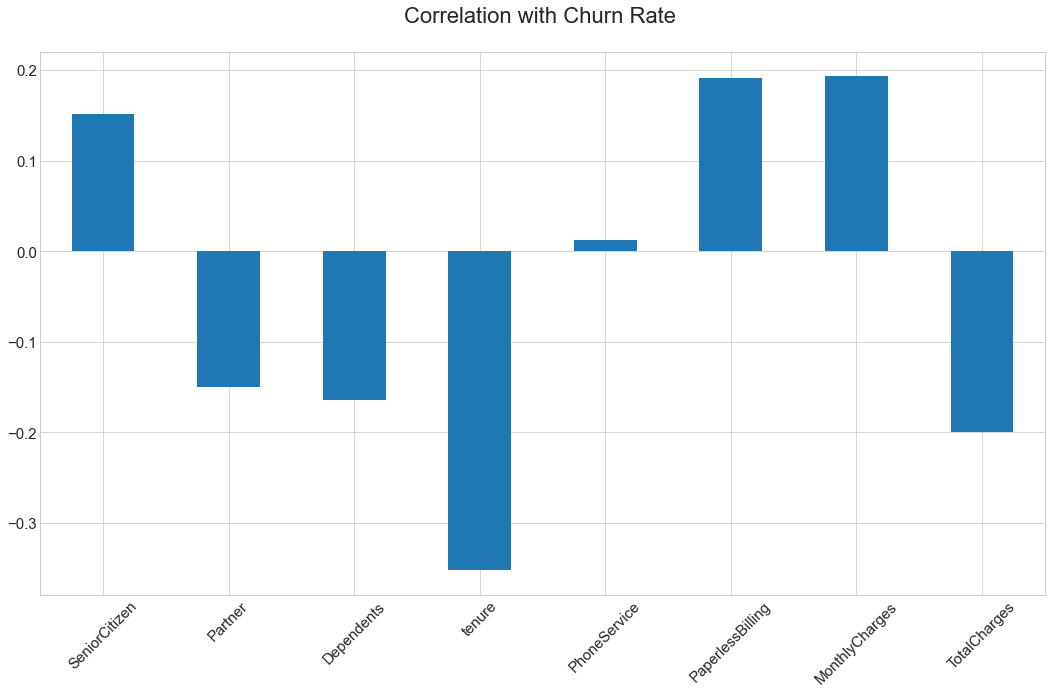

In [34]:
df2 = df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
correlations = df2.corrwith(df.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

correlations = df2.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

<AxesSubplot:>

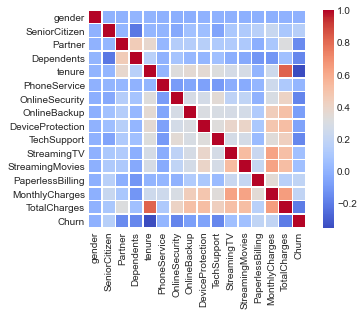

In [35]:
#check for correlations
sns.heatmap(df.corr(), cmap='coolwarm', square=True, linewidths=.5)

## Some conclusions from analysis part

- People with tech support option are less likely to churn
- Fibre optic customers have very high churn rates
- Paperless billing has very high churn rate (may be influenced by other factor and may not have direct causality)
- The longer customers are subscribed, the less likely they are going to chrun. -> Logically, this applies also to Total Charges
- High monthly charges (customers with a lot of services) have also high churn rates

Looking at different customer segments:
- Gender does not seem to have an impact on churn probabilities
- Seniors are more likely to churn
- People with dependents or partners tend to stay longer subscribed

### Prepare data for the ML model

#### Check for colliniarity within data

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
df2 = df[['gender', 
'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService',
'PaperlessBilling','MonthlyCharges',
'TotalCharges']]
calc_vif(df2)

,variables,VIF
0,gender,1.921675
1,SeniorCitizen,1.327914
2,Partner,2.815250
3,Dependents,1.922203
4,tenure,10.540241
5,PhoneService,7.974506
6,PaperlessBilling,2.815829
7,MonthlyCharges,13.984677
8,TotalCharges,12.562110


#### Monthly Charges, TotalCharges and tenure have a high collinearity and are all three correlated. -> Dropping TotalCharges

In [37]:
# drop total charges
df = df.drop(columns = "TotalCharges")

#### There are still some variables which are categorial and have not been transformed to binary

In [38]:
#safe customer ids before deleting them    
identity = df["customerID"]
df = df.drop(columns="customerID")
#Convert all other categorical variable into dummys:
df= pd.get_dummies(df)
#Rejoin identities:
df = pd.concat([df, identity], axis = 1)
#df.head()

#### Scale numerical features tenure and monthly charges

In [39]:
from sklearn.preprocessing import StandardScaler

#Feature Scaling for the numerical features tenure, Montly Charges

standardScaler = StandardScaler()
scaled_columns = ['tenure', 'MonthlyCharges']

df[scaled_columns]=standardScaler.fit_transform(df[scaled_columns])

### Prepare the ML models

In [40]:
# y=output variable, x=input variables for our ML model
y= df['Churn']
x= df.drop(['Churn'], axis=1)

In [41]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 20)

In [42]:
#remove id from dataset but safe it for later
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [43]:
'''Balance the imbalanced data. This will gernerally lead to lower accuracies when testing data later
(based on nature of the data -> churn proportion). Since our goal is not only to maximize accuracy, but to have a focus on
actually identifying churners, we also want to maximize recall and therefore consider other metrics such as F1 score. To do 
this, balancing is necessary.
'''
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

In [44]:
models =  []
accuracies = []
precisions = []
recalls = []
F1s = []

In [45]:
def get_best_model_and_accuracy(model, params, X_train, y_train, X_test, y_test):
    
    from sklearn.model_selection import GridSearchCV
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix 
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import matthews_corrcoef
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
   
    
    grid = GridSearchCV(model,           # the model to grid search
                        params,          # the parameter set to try 
                        error_score=0.)  # if a parameter set raises an error, continue and set the performance as a big
    
    grid.fit(X_train_rus, y_train_rus)   # fit the model and parameters
    
    
    
    y_pred = grid.predict(X_test)
    # our classical metric for performance
    print ("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print ("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    print ("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print ("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))
    
    #print ("classification report")
    #print(classification_report(y_test, y_pred))
    
    # creating a confusion matrix 
    print ("confusion matrix")
    cm = confusion_matrix(y_test, y_pred)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
    #Accuracy on test set with k-fold cross validation. 
    #k-fold cross validation is a procedure used to estimate the skill of the model on new data.
    accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Cross validation accuracy: %0.2f (+/- %0.2f)"  % (accuracy.mean(), accuracy.std() * 2))
    accuracies.append(accuracy.mean())
    
    #Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('\nAccuracy on test data %s' % accuracy)
    
    #Recall
    recall = recall_score(y_test, y_pred)
    print('\nRecall score %s' % recall)
    recalls.append(recall)
    
    #Precision
    precision = precision_score(y_test, y_pred)
    print('\nPrecision %s' % precision)
    precisions.append(precision)
    
    #F1- Score
    F1 = f1_score(y_test, y_pred)
    print('\nF1-score %s' %F1)
    F1s.append(F1)
    
    #MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    print('\nMCC %s' % mcc)
    
    #AUC ROC
    auc_roc = roc_auc_score(y_test, y_pred)
    print('\nROC AUC score %s' % auc_roc)
    
    models.append(model) # save corresponding models for visualization
   

In [46]:
from sklearn.dummy import DummyClassifier
# Import five machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Set up dummy classifier for comparason
clf_params = {'strategy': ['most_frequent']}
# Set up some parameters for our grid search
# We will start with five different machine learning models
# logistic regression, KNN, Decision Tree, Random Forest and GaussianNB

lr_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
knn_params = {'n_neighbors': [1, 3, 5, 7]}
tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'max_leaf_nodes':[3]}
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]}
svc_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gnb_params = {'priors':[None], 'var_smoothing':[1e-09]}

# instantiate dummy classifier
clf = DummyClassifier()
# instantiate the five machine learning models
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
forest = RandomForestClassifier()


### Dummy Classifier

In [47]:
#get_best_model_and_accuracy(clf, clf_params, X_train, y_train, X_test, y_test)

### ML algorithms

Best Accuracy: 0.7692705968721926
Best Parameters: {'C': 1, 'solver': 'newton-cg'}
Average Time to Fit (s): 0.019
Average Time to Score (s): 0.003
confusion matrix


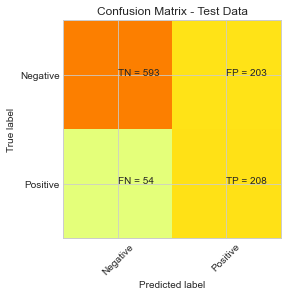

Cross validation accuracy: 0.80 (+/- 0.03)

Accuracy on test data 0.7570888468809074

Recall score 0.7938931297709924

Precision 0.5060827250608273

F1-score 0.6181277860326895

MCC 0.4772176809339368

ROC AUC score 0.7694340020714258


In [48]:
get_best_model_and_accuracy(lr, lr_params, X_train, y_train, X_test, y_test)

<br>

The results below show that by using the unbalanced data opposed to the ballanced data to train the model, a higher accuracy and precision can be achived. However, since we also want to focus on recall, we will be using the ballanced data.
<br>
#### Results for the logarithmic regression model using the unbalanced data

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print('\nAccuracy on tested data %s' % accuracy)
recall = recall_score(y_test, y_pred_lr)
print('\nRecall score %s' % recall)
precision = precision_score(y_test, y_pred_lr)
print('\nPrecision %s' % precision)
F1 = f1_score(y_test, y_pred_lr)
print('\nF1-score %s' %F1)


Accuracy on tested data 0.8204158790170132

Recall score 0.5572519083969466

Precision 0.6636363636363637

F1-score 0.6058091286307054


Best Accuracy: 0.7462631492518571
Best Parameters: {'n_neighbors': 7}
Average Time to Fit (s): 0.021
Average Time to Score (s): 0.06
confusion matrix


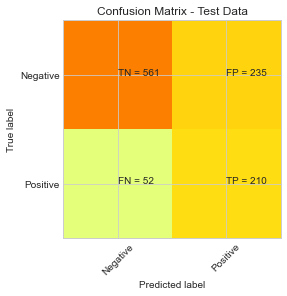

Cross validation accuracy: 0.76 (+/- 0.02)

Accuracy on test data 0.7287334593572778

Recall score 0.8015267175572519

Precision 0.47191011235955055

F1-score 0.594059405940594

MCC 0.4426957652364491

ROC AUC score 0.7531502934519927


In [50]:
get_best_model_and_accuracy(knn, knn_params,X_train, y_train, X_test, y_test)

Best Accuracy: 0.7403601132115568
Best Parameters: {'max_depth': None, 'max_leaf_nodes': 3}
Average Time to Fit (s): 0.007
Average Time to Score (s): 0.003
confusion matrix


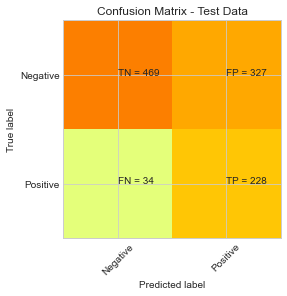

Cross validation accuracy: 0.73 (+/- 0.03)

Accuracy on test data 0.6587901701323251

Recall score 0.8702290076335878

Precision 0.41081081081081083

F1-score 0.5581395348837209

MCC 0.3970921554416495

ROC AUC score 0.7297124937665426


In [51]:
get_best_model_and_accuracy(d_tree, tree_params, X_train, y_train, X_test, y_test)

Best Accuracy: 0.7590100750557849
Best Parameters: {'priors': None, 'var_smoothing': 1e-09}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.005
confusion matrix


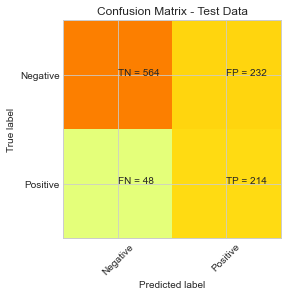

Cross validation accuracy: 0.74 (+/- 0.03)

Accuracy on test data 0.7353497164461248

Recall score 0.816793893129771

Precision 0.4798206278026906

F1-score 0.6045197740112994

MCC 0.45919981415484523

ROC AUC score 0.7626683033488052


In [52]:
get_best_model_and_accuracy(gnb, gnb_params, X_train, y_train, X_test, y_test)

Best Accuracy: 0.7677173188566792
Best Parameters: {'C': 0.1, 'kernel': 'poly'}
Average Time to Fit (s): 3.332
Average Time to Score (s): 0.042
confusion matrix


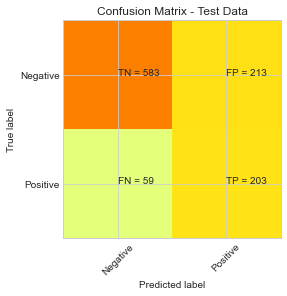

Cross validation accuracy: 0.79 (+/- 0.03)

Accuracy on test data 0.7429111531190926

Recall score 0.7748091603053435

Precision 0.4879807692307692

F1-score 0.5988200589970502

MCC 0.44821915757282166

ROC AUC score 0.7536106103034255


In [53]:
get_best_model_and_accuracy(svc, svc_params, X_train, y_train, X_test, y_test)

Best Accuracy: 0.7692739777633956
Best Parameters: {'max_depth': 7, 'n_estimators': 50}
Average Time to Fit (s): 0.132
Average Time to Score (s): 0.011
confusion matrix


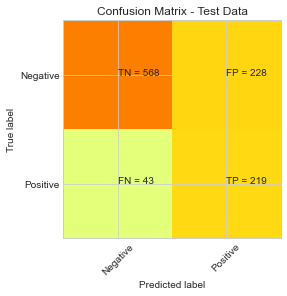

Cross validation accuracy: 0.78 (+/- 0.03)

Accuracy on test data 0.7438563327032136

Recall score 0.8358778625954199

Precision 0.4899328859060403

F1-score 0.6177715091678421

MCC 0.48012861840797516

ROC AUC score 0.7747228508956999


In [54]:
get_best_model_and_accuracy(forest, forest_params, X_train, y_train, X_test, y_test)

## Model recalls and precisions

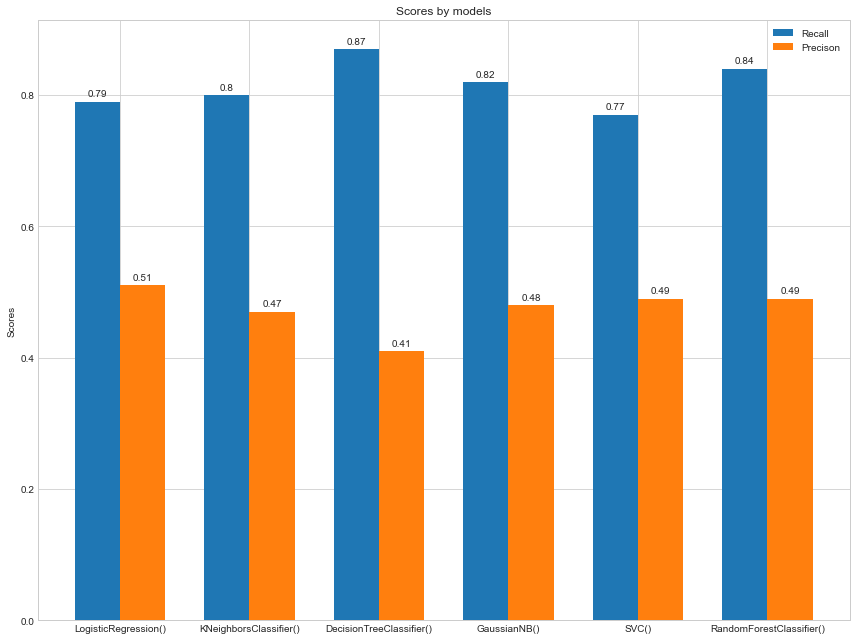

In [75]:
rounded_recalls = [ round(elem, 2) for elem in recalls ]
rounded_precisons = [ round(elem, 2) for elem in precisions ]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 9))
rects1 = ax.bar(x - width/2, rounded_recalls, width, label='Recall')
rects2 = ax.bar(x + width/2, rounded_precisons, width, label='Precison')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

For the business case, accuracy was not identified as the only and best metric to use. For telco companies, aquisition costs are assumed to be high and losing a customer is thus to be prevented. Identifying as many  customers as possible before they churn is extreamly important, because the churn might be possibly prevented through some actions. This is represented by the recall metric.
<br>

The Decision Tree has the highest recall, but it only has a poor precision. To choose a modle the **F1 score** takes **precison and recall** into consideration.

In [56]:
results = pd.DataFrame(list(zip(accuracies, recalls, precisions, F1s)), 
                  columns= ['Accuracy', 'Recall', 'Precision', 'F1-Score'], 
                  index=models)
results = results.sort_values(['F1-Score'],ascending=False)
print(results)

                          Accuracy    Recall  Precision  F1-Score
LogisticRegression()      0.799264  0.793893   0.506083  0.618128
RandomForestClassifier()  0.781911  0.835878   0.489933  0.617772
GaussianNB()              0.743370  0.816794   0.479821  0.604520
SVC()                     0.794591  0.774809   0.487981  0.598820
KNeighborsClassifier()    0.761057  0.801527   0.471910  0.594059
DecisionTreeClassifier()  0.726678  0.870229   0.410811  0.558140


Taking the F1-Score into consideration the ***Random Forest Classifier*** produces the best results.

### Fit the best performing model with the best parameters from grid search to create the classifier

In [57]:
# Fit RandomForest
# Best Parameters:'max_depth': 7, 'n_estimators': 100
forestmodel = RandomForestClassifier(max_depth = 7, n_estimators= 100)
forestmodel.fit(X_train_rus,y_train_rus)

RandomForestClassifier(max_depth=7)

### Use the classifier and apply it to your test data to predict churn and churn probabilities

In [58]:
#predict churn for each customer
y_pred = forestmodel.predict(X_test)
# probability score
y_pred_probs = forestmodel.predict_proba(X_test)
y_pred_probs = y_pred_probs [:,1]

### Final results shown in confusion matrix

Accuracy: 0.7476
Recall score: 0.8244
Precision: 0.4943
F1-Score: 0.6180


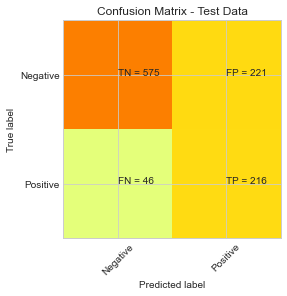

In [69]:
 from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score 

cm = confusion_matrix(y_test, y_pred)
    
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
        
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
print('Recall score: %0.4f' % recall_score(y_test, y_pred))
print('Precision: %0.4f' % precision_score(y_test, y_pred))
print('F1-Score: %0.4f' % f1_score(y_test, y_pred))

### Prediction results in table

In [70]:
#Display the results of the algorithm to predict churn and probability of churn for the test data 
predictions = pd.concat([test_identity, y_test], axis = 1).dropna()
predictions['Churn_Prediction'] = y_pred
predictions["Probability_to_churn_(%)"] = y_pred_probs
predictions["Probability_to_churn_(%)"] = predictions["Probability_to_churn_(%)"]*100
predictions["Probability_to_churn_(%)"]=predictions["Probability_to_churn_(%)"].round(2)
predictions = predictions[['customerID', 'Churn', 'Churn_Prediction', 'Probability_to_churn_(%)']]
predictions['Ranking'] = pd.qcut(predictions['Probability_to_churn_(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

In [71]:
predictions.head()

,customerID,Churn,Churn_Prediction,Probability_to_churn_(%),Ranking
798,3807-XHCJH,0,1,52.65,4
2927,5542-TBBWB,0,1,88.02,1
5385,0843-WTBXE,1,1,57.90,4
3389,9617-INGJY,0,1,83.39,1
2923,4402-FTBXC,0,0,44.79,5


In [72]:
predictions.sort_values(by="Ranking", ascending=False)

,customerID,Churn,Churn_Prediction,Probability_to_churn_(%),Ranking
3270,4132-KALRO,0,1,81.27,1
4482,6711-FLDFB,1,1,84.74,1
2405,2929-ERCFZ,1,1,84.75,1
6633,4415-IJZTP,1,1,88.58,1
5759,9985-MWVIX,1,1,84.09,1
...,...,...,...,...,...
2221,8619-IJNDK,0,0,3.40,10
4038,2525-GVKQU,0,0,1.78,10
1773,2007-QVGAW,0,0,1.71,10
998,2545-LXYVJ,0,0,1.31,10


The final model can be used by taking actions for all customers, who have been identified as churners. Alternatively special actions can take place by only targeting customers with a churn ranking of 1 for example. Depending on the retention strategy either method may be valuable.